## Data Preperation

In [1]:
using CSV

In [2]:
df = CSV.read("./NYC/arcs.csv", delim=';', header=false);

### Constraints
$$A \pi = d$$

In [3]:
nbNodes = maximum(df[2])
nbArcs = length(df[2])
A = spzeros(nbNodes, nbArcs)

472×1230 SparseMatrixCSC{Float64,Int64} with 0 stored entries

In [4]:
for i in 1:length(df[1])
    A[df[1][i], i] = -1
    A[df[2][i], i] = 1
end

In [5]:
d = spzeros(maximum(df[2]))
d[446] = 1
d[465] = -1

-1

### Objective Function
$$c' \cdot \pi$$

In [6]:
c = df[3];

## Model Setup

In [7]:
using Gurobi, JuMP

In [8]:
m = Model(solver=GurobiSolver());
#m = Model(solver=GLPKSolverLP(method=:Exact, presolve=false));

In [9]:
@variable(m, π[1:nbArcs] >= 0, Int)

1230-element Array{JuMP.Variable,1}:
 π[1]   
 π[2]   
 π[3]   
 π[4]   
 π[5]   
 π[6]   
 π[7]   
 π[8]   
 π[9]   
 π[10]  
 π[11]  
 π[12]  
 π[13]  
 ⋮      
 π[1219]
 π[1220]
 π[1221]
 π[1222]
 π[1223]
 π[1224]
 π[1225]
 π[1226]
 π[1227]
 π[1228]
 π[1229]
 π[1230]

In [10]:
@constraint(m, A * π .== d);

In [11]:
@objective(m, Min, c'*π);

In [12]:
solve(m)

Academic license - for non-commercial use only
Optimize a model with 472 rows, 1230 columns and 2460 nonzeros
Variable types: 0 continuous, 1230 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+02, 6e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 155 rows and 368 columns
Presolve time: 0.00s
Presolved: 317 rows, 862 columns, 1724 nonzeros
Variable types: 0 continuous, 862 integer (0 binary)
Found heuristic solution: objective 12115.414016

Root relaxation: objective 1.166550e+04, 103 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    11665.498416 11665.4984  0.00%     -    0s

Explored 0 nodes (103 simplex iterations) in 0.01 seconds
Thread count was 2 (of 2 available processors)

Solution count 2: 11665.5 12115.4 

Optimal solution found

:Optimal

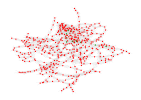

In [97]:
using LightGraphs, GraphPlot, Compose, Colors


g = DiGraph(nbNodes)
for i in 1:length(df[1])
    add_edge!(g, df[1][i], df[2][i])
end

sources = df[1][getvalue(π) .!= 0]
dests = df[2][getvalue(π) .!= 0]

membership = ones(Int64, nbNodes)
membership[union(sources, dests)] = 2

nodecolor = [colorant"red", colorant"green"]
nodefillc = nodecolor[membership]



gplot(g, nodefillc=nodefillc)
#gplot(g)

Coloring does not work!